In [37]:
# transistor parameters

vth = 0.4 # V
uncox = 170e-6 # A/V^2
lambdan = 0.18 # 1/V
cgs_w_l130nm = 1.19*1e-15/1e-6 # F/m
cgd_w_l130nm = 0.65*1e-15/1e-6 # F/m
cdb_w = 0.31*1e-15/1e-6 # F/m
csb_w = 0.4*1e-15/1e-6 # F/m
cov_w = 300/500*1e-15/1e-6 # F/m

In [53]:
# cap bank modeling

# unit row
# ****************************************

import numpy as np
import matplotlib.pyplot as plt

# initial values of Msw
widthn = np.array([0.5e-6,1e-6,5e-6,10e-6,20e-6,50e-6]) # m
lengthn = 0.13e-6 # m
vgs = 1.2 # V
n = 4

cgs = cgs_w_l130nm*widthn
cgd = cgd_w_l130nm*widthn
cdb = cdb_w*widthn
csb = csb_w*widthn
cov = cov_w*widthn

c1off = (cdb + csb + 2*cov)/2
c2off = c1off

c1on = (cdb + csb + cgd + cgs)/2
c2on = c1on

Ron = 1/(uncox*(widthn/lengthn)*(vgs-vth))

# unit cap = cb
pi_value = 3.14159
Ls = 100e-9
Rs = 6e-3
f_sr = 800e6
c_par = 1/(Ls * (2*pi_value*f_sr)**2)
f_center = 433e6
q_ind_est = 2*pi_value*f_center*Ls/Rs
q_ind = 220 #q_coil
Rp_ind = Rs*(1+q_ind**2)
f_ul = 1.1*f_center
f_step = (f_ul-f_center)/(2**(n-1))
c_res = 1/((2*pi_value*f_center)**2 * Ls)
print('c_res = ' + str(c_res))
cb = 2*(1/((2*pi_value*(f_center-f_step))**2 * Ls) - c_res)
print('cb = ' + str(cb))

Zmag_c1on = 1/(2*pi_value*f_center*c1on)

#Cp_cap = cb/2

Cs_cap = c1on * (1 + (2*pi_value*f_center*Ron*0.5*c1on)**2)/((2*pi_value*f_center*Ron*0.5*c1on)**2)
Rs_cap = 0.5*Ron / (1+(2*pi_value*f_center*Ron*0.5*c1on)**2)

Rp_cap = 1/((2*Rs_cap)*(2*pi_value*f_center*2*cb)**2)
Rp_cap_total = Rp_cap/2**n

print('c_par = ' + str(c_par))
print('q_ind = ' + str(q_ind))
print('q_ind_est = ' + str(q_ind_est))
print('Rp_ind = ' + str(Rp_ind))
print('Cs_cap = ' + str(Cs_cap))
print('Rs_cap = ' + str(Rs_cap))
print('Ron = ' + str(Ron))


c_res = 1.3510306578951275e-12
cb = 6.88395688528522e-14
c_par = 3.957865422157805e-13
q_ind = 220
q_ind_est = 45343.615666666665
Rp_ind = 290.406
Cs_cap = [2.31940891e-10 4.63881782e-10 2.31940891e-09 4.63881782e-09
 9.27763564e-09 2.31940891e-08]
Rs_cap = [955.87972566 477.93986283  95.58797257  47.79398628  23.89699314
   9.55879726]
Ron = [1911.76470588  955.88235294  191.17647059   95.58823529   47.79411765
   19.11764706]


C:\Users\Manuel\AppData\Local\Temp\ipykernel_30044\1294258316.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(loc='best',fontsize='small')


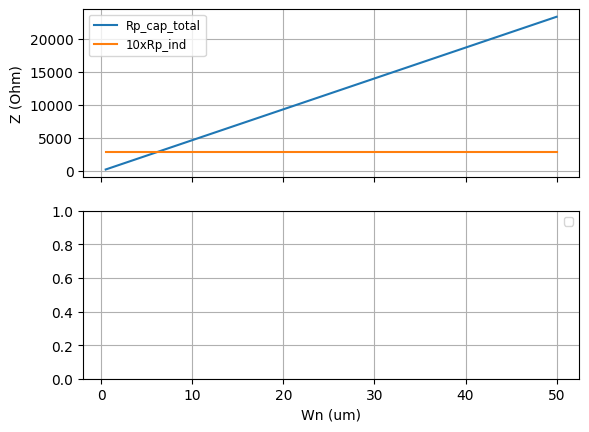

In [54]:
# ID vs VDS
fig, axs = plt.subplots(2,1,sharex='col')

#axs[0].set_title('sg13_lv_nmos (L=0.5um, VGS=0.75V)')
axs[0].plot(widthn*1e6, Rp_cap_total, label='Rp_cap_total')
axs[0].plot(widthn*1e6, 10*Rp_ind*np.array([1,1,1,1,1,1]), label='10xRp_ind')
axs[0].set_ylabel('Z (Ohm)')
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')
axs[1].set_xlabel('Wn (um)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')

plt.show()

In [55]:
# output W
widthn_val = np.interp(10*Rp_ind,Rp_cap_total,widthn)
print('widthn_val = ' + str(widthn_val))
print('widthn_val/2 = ' + str(widthn_val/2))

widthn_val = 6.231604586021373e-06
widthn_val/2 = 3.1158022930106866e-06
